In [1]:
import os
ROOT_DIR = "/home/nrr/projects/inundation-emulator"
os.chdir(ROOT_DIR)

In [2]:
from src.emulator import Emulator, DataReader
import tensorflow as tf
import matplotlib.pyplot as plt
from netCDF4 import Dataset

2025-05-08 13:04:35.391055: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 13:04:35.391824: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 13:04:35.395494: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 13:04:35.406419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746709475.425162 1007168 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746709475.43

In [3]:
# Load pretrained emulator.

GENERATED_DIR = "/home/nrr/projects/inundation-emulator/generated"
TOPO_FILE = '/home/ebr/data/PTHA2020_runs_UMA/Catania/C_CT.grd'
TOPO_MASK = '/home/ebr/data/PTHA2020_runs_UMA/Catania/ct_mask.txt'
TRAIN_SCENARIOS = "/home/nrr/projects/inundation-emulator/scenario.txt"
TRAIN_DIR = '/home/nrr/NGI/P/2022/02/20220296/Calculations/temp_emulator'
VALIDATION_SCENARIOS = '/home/ebr/data/PTHA2020_runs_UMA/test/scenarios.txt'
VALIDATION_DIR = "/home/ebr/data/PTHA2020_runs_UMA/test"

RUNDIR = "/home/nrr/projects/inundation-emulator/generated/emulator_20250406_124935"
EPOCH_CHECKPOINT = 300

emulator = Emulator(GENERATED_DIR, RUNDIR)

W0000 00:00:1746709478.031478 1007168 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-05-08 13:04:39,317 - src.emulator - INFO - Encoder:


2025-05-08 13:04:39,332 - src.emulator - INFO - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 15, 481, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 13, 479, 8)     │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 13, 479, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 239, 8)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 235, 16)     │         1,920 │
├───────

2025-05-08 13:04:39,340 - src.emulator - INFO - Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 418908)         │    27,229,020 │
├─────

In [4]:
emulator.topomask.shape

(2224, 912)

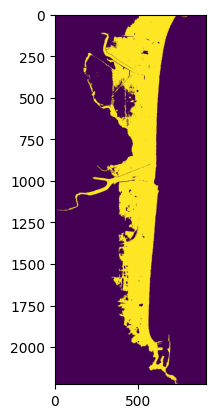

In [5]:
plt.imshow(emulator.topomask)

In [4]:
PREDICTION_DIR = "/home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250406_124935"

In [5]:

from pprint import pprint

def inspect_nc_file(file_path):
    # Open the NetCDF file
    dataset = Dataset(file_path, 'r')
    
    # Print general information about the dataset
    print(f"File: {file_path}")
    print(f"Dimensions:")
    pprint(dataset.dimensions)
    
    print(f"\nVariables:")
    pprint(dataset.variables)
    
    print(f"\nGlobal Attributes:")
    pprint(dataset.ncattrs())
    for attr in dataset.ncattrs():
        print(f"{attr}: {getattr(dataset, attr)}")
    
    # Close the dataset
    dataset.close()

# /home/nrr/projects/inundation-emulator/generated/predictions/emulator_20250406_124935/preds_20250406_171039

# Example usage
file_path_pred = os.path.join(PREDICTION_DIR, "preds_20250406_171039", "1113_E02020N3739E02658N3366-PS-Str_PYes_Var-M888_E02128N3626_S001_CT_10m_PR.nc")
file_path_true = "/home/nrr/NGI/T/Tsunami/PTHA2020_runs_UMA/batch_0006001_0007000/1113_E02020N3739E02658N3366-PS-Mur_PYes_Hom-M837_E02226N3500_S000_CT_10m.nc"
# inspect_nc_file(file_path_pred)
inspect_nc_file(file_path_true)

File: /home/nrr/NGI/T/Tsunami/PTHA2020_runs_UMA/batch_0006001_0007000/1113_E02020N3739E02658N3366-PS-Mur_PYes_Hom-M837_E02226N3500_S000_CT_10m.nc
Dimensions:
{'grid_lat': "<class 'netCDF4.Dimension'>": name = 'grid_lat', size = 2224,
 'grid_lon': "<class 'netCDF4.Dimension'>": name = 'grid_lon', size = 912,
 'lat': "<class 'netCDF4.Dimension'>": name = 'lat', size = 2224,
 'lon': "<class 'netCDF4.Dimension'>": name = 'lon', size = 912,
 'time': "<class 'netCDF4.Dimension'>" (unlimited): name = 'time', size = 2}

Variables:
{'deformation': <class 'netCDF4.Variable'>
int16 deformation(grid_lat, grid_lon)
    scale_factor: 0.0015259022
    add_offset: 0.0007629511
    long_name: Deformation of the bathymetry
    standard_name: deformation
    units: meters
    missing_value: 32767
    _FillValue: 32767
unlimited dimensions: 
current shape = (2224, 912)
filling on,
 'grid_lat': <class 'netCDF4.Variable'>
float64 grid_lat(grid_lat)
    long_name: Grid latitude
    units: degrees
unlimited d

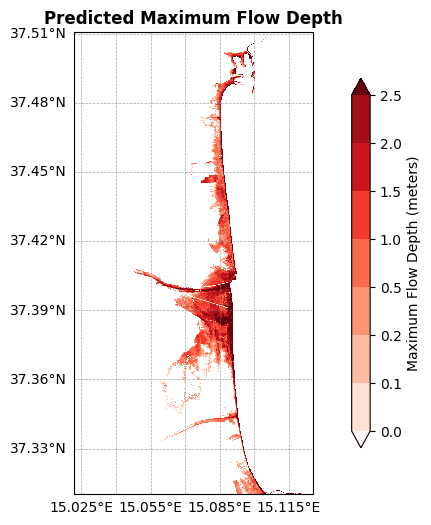

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# Load the netCDF file
#file_path = "your_file.nc"  # Change to your actual file path
dataset = nc.Dataset(file_path_pred)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['predicted'][:]

#set 0 to nan 
predicted = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, predicted, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Predicted Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


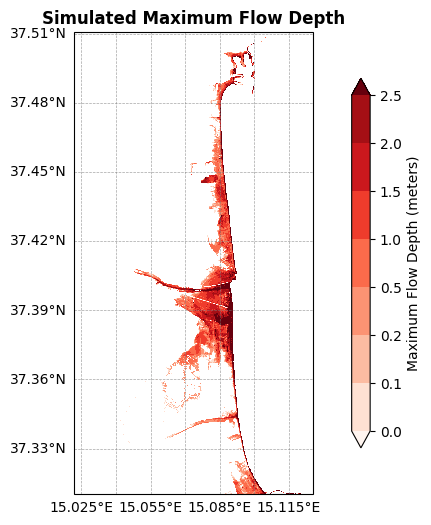

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# Load the netCDF file
file_path = "/home/nrr/data/PTHA2020_runs_UMA/CT_flowdepth.nc"  # Change to your actual file path copied from simulation folder
dataset = nc.Dataset(file_path)

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
predicted = dataset.variables['z'][:]

#set 0 to nan 
true = np.where(predicted <= 0, np.nan, predicted)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('Reds')
bounds = [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, true, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Simulated Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


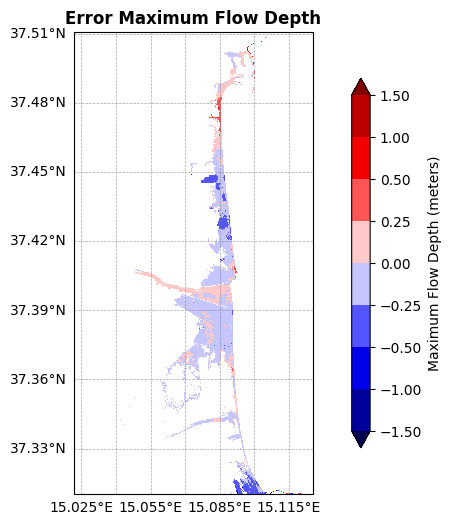

In [37]:
error = predicted - true

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot predicted values as a heatmap
cmap = cm.get_cmap('seismic')
bounds = [ -1.5,-1, -0.5, -0.25,0,0.25, 0.5, 1, 1.5]
norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')
img = ax.pcolormesh(lon, lat, error, cmap=cmap, norm=norm, shading='auto', transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(img, ax=ax, orientation="vertical", shrink=0.8, pad=0.05)
cbar.set_label("Maximum Flow Depth (meters)")

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)
gl.xformatter = cticker.LongitudeFormatter()
gl.yformatter = cticker.LatitudeFormatter()
gl.top_labels = False  # Remove top labels
gl.right_labels = False  # Remove right labels

# Set axis labels
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Add a title
plt.title("Error Maximum Flow Depth", fontsize=12, fontweight="bold")

# Show the plot
plt.show()
